Blood transfer


In [ ]:
import pandas as pd
data=pd.read_csv("transfusion.data",sep=",",header=0)
print(data)

     Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
..                ...                ...                    ...   
743                23                  2                    500   
744                21                  2                    500   
745                23                  3                    750   
746                39                  1                    250   
747                72                  1                    250   

     Time (months)  donated  
0               98        1  
1               28        1  
2               35        1  
3               45        1  
4               77        0  
..             

In [ ]:
x=pd.DataFrame(data.drop(["donated"], axis=1))
y=pd.DataFrame(data["donated"])
print(x)


     Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
0                   2                 50                  12500             98
1                   0                 13                   3250             28
2                   1                 16                   4000             35
3                   2                 20                   5000             45
4                   1                 24                   6000             77
..                ...                ...                    ...            ...
743                23                  2                    500             38
744                21                  2                    500             52
745                23                  3                    750             62
746                39                  1                    250             39
747                72                  1                    250             72

[748 rows x 4 columns]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = 3
model = DecisionTreeClassifier(max_depth = max_depth)
model.fit(x, y)
pred = model.predict(x)

print(accuracy_score(y, pred))

0.7954545454545454


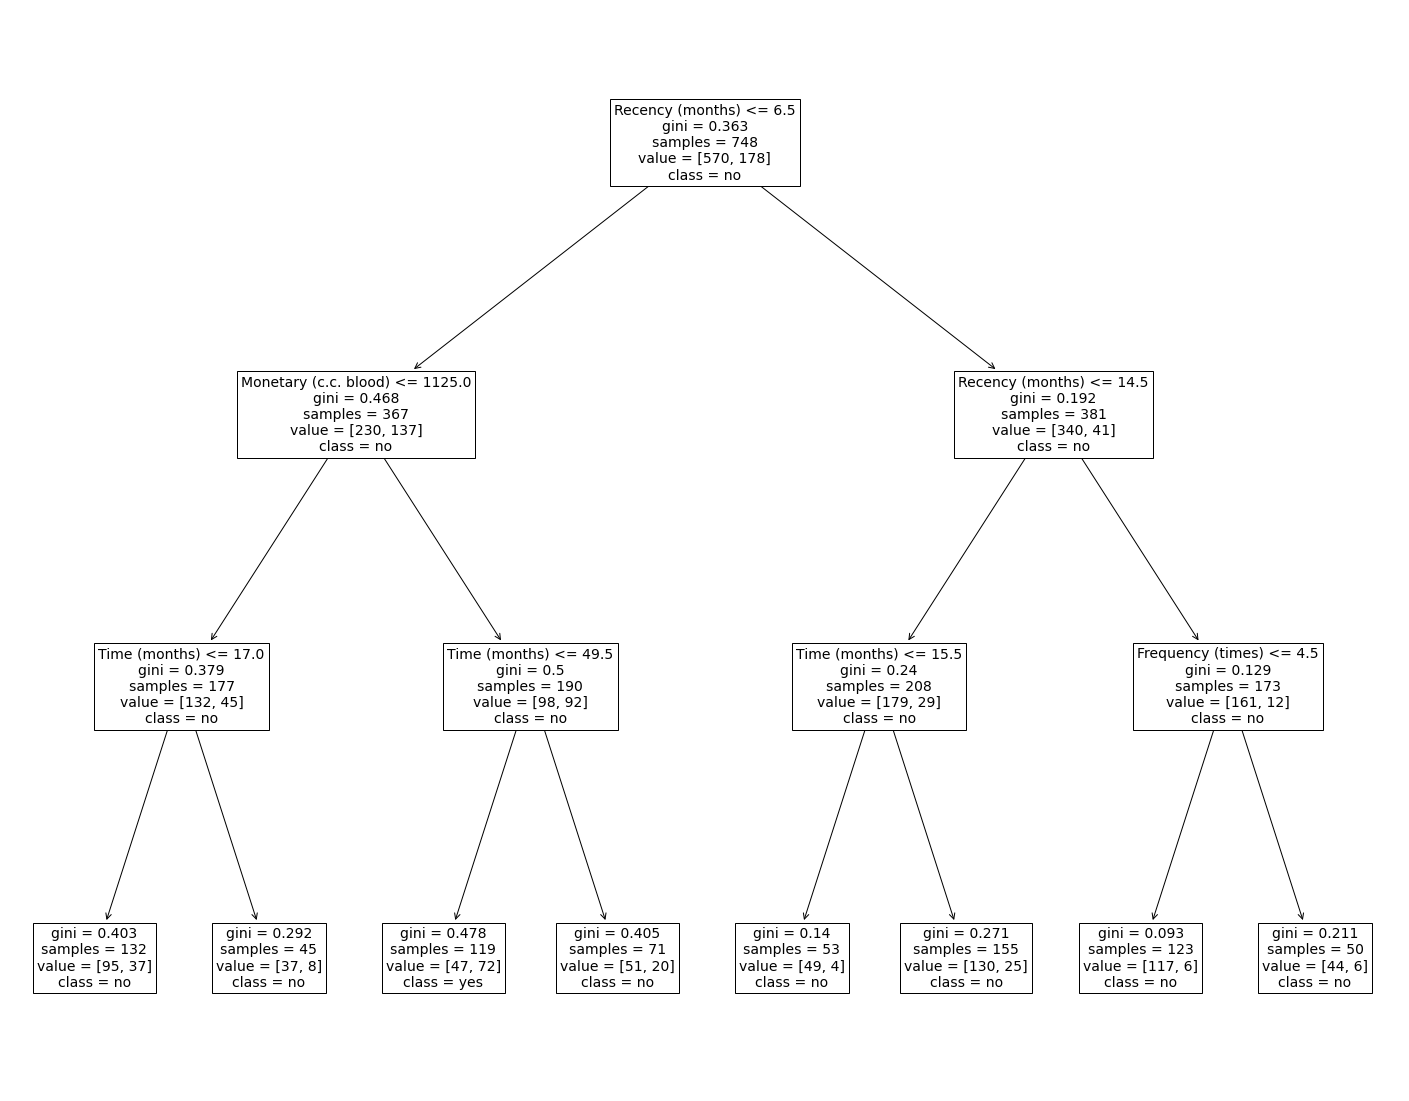

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
tree.plot_tree(model,feature_names=x.columns,class_names=["no","yes"],fontsize=14)
fig.savefig('tree.png')
fig.show()

# 2. Creating terms

In [ ]:
!pip install pydatalog
from pyDatalog import pyDatalog


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 304 kB 8.1 MB/s 
  Created wheel for pydatalog: filename=pyDatalog-0.17.1-py2.py3-none-any.whl size=74208 sha256=41bf09fd270185c26555b8703a41a059bc241406f8d02a6dc82be287f8d85036
  Stored in directory: /root/.cache/pip/wheels/04/e7/e1/8fa2c8dfe74d0b9e20818c8ec00c20657baa0738976c93e46e
Successfully built pydatalog


In [ ]:
pyDatalog.create_terms('U, V, Recency_months, Frequency_times, Monetary_cc_blood, Time_months, label')

In [ ]:
(label[U] == 'no') <= (Recency_months[U] > 6.5)
(label[U] == 'yes') <= (Recency_months[U] <= 6.5) & (Frequency_times[U] > 4.5) & (Time_months[U] <= 49.5)

label[1]==(*,U,'yes') <= Recency_months[1]<=(*,U,'

In [ ]:
#(label[U] == 'no') <= (Recency_months[U] > 6.5)
#(label[U] == 'yes') <= (Time_months[U] <= 49.5)
#(label[U] == 'no') <= (Recency_months[U] <= 14.5) & (Time_months[U] <= 15.5)
#(label[U] == 'no') <= (Monetary_cc_blood[U] <= 1125.0)

In [ ]:
Recency_months[0] = 2
Frequency_times[0] = 20
Monetary_cc_blood[0]=5000
Time_months[0]=45

#print(label[0] == U)


In [ ]:
print(label[0] == U)

U  
---
yes


# 4. 

In [ ]:
from joblib import dump

dump(model, 'tree.joblib')

['tree.joblib']

In [ ]:
from joblib import load
import sklearn

model = load('tree.joblib')
classes = model.classes_
tree = model.tree_

n_nodes = tree.node_count
children_left = tree.children_left
children_right = tree.children_right
feature = tree.feature
threshold = tree.threshold
value = tree.value

In [ ]:
def get_paths(paths):
  for path in paths:
    left = children_left[path[-1]]
    right = children_right[path[-1]]
    if left != right:
      paths.remove(path)
      paths.append(path + [left])
      # paths.append(path + [right])
      paths.append([right])
      get_paths(paths)
  return paths

paths = [[0]]
paths = get_paths(paths)
paths

[[0, 1, 2, 3], [4], [5, 6], [7], [8, 9, 10], [11], [12, 13], [14]]

In [ ]:
rules = []
for path in paths:
  conjs = []
  for i in range(len(path)):
    node = path[i]
    if node == path[-1]:
      samples = list(value[node][0])
      label = samples.index(max(samples))
    else:
      conj = {'feature': feature[node],
              'threshold': round(threshold[node], 2)}
      child = path[i+1]
      if child in children_left:
        conj['comparison'] = '<='
      else:
        conj['comparison'] = '>'
      conjs.append(conj)
  rules.append({'label':label, 'conjs': conjs})

rules

[{'label': 0,
  'conjs': [{'feature': 0, 'threshold': 6.5, 'comparison': '<='},
   {'feature': 2, 'threshold': 1125.0, 'comparison': '<='},
   {'feature': 3, 'threshold': 17.0, 'comparison': '<='}]},
 {'label': 0, 'conjs': []},
 {'label': 1,
  'conjs': [{'feature': 3, 'threshold': 49.5, 'comparison': '<='}]},
 {'label': 0, 'conjs': []},
 {'label': 0,
  'conjs': [{'feature': 0, 'threshold': 14.5, 'comparison': '<='},
   {'feature': 3, 'threshold': 15.5, 'comparison': '<='}]},
 {'label': 0, 'conjs': []},
 {'label': 0, 'conjs': [{'feature': 1, 'threshold': 4.5, 'comparison': '<='}]},
 {'label': 0, 'conjs': []}]

In [ ]:

def format_name(name):
  name = str(name)
  name = name.replace(' ', '_')
  name = name.replace('.', '')
  name = name.replace('(', '')
  name = name.replace(')', '')
  return name

data=pd.read_csv("transfusion.data",sep=",",header=0)
feature_names = [format_name(x) for x in data.columns.values]
class_names = [f"'{x}'" for x in ["no","yes"]]

print(feature_names)
print(class_names)

['Recency_months', 'Frequency_times', 'Monetary_cc_blood', 'Time_months', 'donated']
["'no'", "'yes'"]


In [ ]:
tmplts = []
for rule in rules:
  label = class_names[rule['label']]
  tmplt_label = f'(label[X] == {label})'
  conjs = rule['conjs']
  if conjs:
    conds = []
    for conj in conjs:
      f_name = feature_names[conj['feature']]
      conds.append(f'({f_name}[X] {conj["comparison"]} {conj["threshold"]})')
    tmplt_cond = ' & '.join(conds)
    tmplts.append(f'{tmplt_label} <= {tmplt_cond}')
  else:
    tmplts.append(tmplt_label)

tmplts

["(label[X] == 'no') <= (Recency_months[X] <= 6.5) & (Monetary_cc_blood[X] <= 1125.0) & (Time_months[X] <= 17.0)",
 "(label[X] == 'no')",
 "(label[X] == 'yes') <= (Time_months[X] <= 49.5)",
 "(label[X] == 'no')",
 "(label[X] == 'no') <= (Recency_months[X] <= 14.5) & (Time_months[X] <= 15.5)",
 "(label[X] == 'no')",
 "(label[X] == 'no') <= (Frequency_times[X] <= 4.5)",
 "(label[X] == 'no')"]

In [ ]:
from pyDatalog import pyDatalog

feature_indices = [x for x in set(feature) if x>=0]
predicates = ', '.join([feature_names[x] for x in feature_indices])
pyDatalog.create_terms('X, Y, label, ' + predicates)

In [ ]:
tmplts.reverse()
knowledge = """\n""".join(tmplts)
pyDatalog.load("""
"""+knowledge+"""
""")
print(knowledge)

(label[X] == 'no')
(label[X] == 'no') <= (Frequency_times[X] <= 4.5)
(label[X] == 'no')
(label[X] == 'no') <= (Recency_months[X] <= 14.5) & (Time_months[X] <= 15.5)
(label[X] == 'no')
(label[X] == 'yes') <= (Time_months[X] <= 49.5)
(label[X] == 'no')
(label[X] == 'no') <= (Recency_months[X] <= 6.5) & (Monetary_cc_blood[X] <= 1125.0) & (Time_months[X] <= 17.0)


In [ ]:
x=51
data=pd.read_csv("transfusion.data",sep=",",header=0)
X=pd.DataFrame(data.drop(["donated"], axis=1))
y=pd.DataFrame(data["donated"])
row = X.iloc[x]
for i in feature_indices:
  fact = f'{feature_names[i]}[{x}] = {row[i]}'
  print(fact)
  exec(fact)

Recency_months[51] = 2
Frequency_times[51] = 11
Monetary_cc_blood[51] = 2750
Time_months[51] = 46


In [ ]:
print(pyDatalog.ask('label[X] == Y'))

{(51, 'yes'), (0, 'yes')}
